In [1]:
import pandas as pd

# Sample data
data = {
    'Year': [2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021],
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3', 'Q4'],
    'GDP_Growth_Rate': [2.5, 3.0, 2.8, 3.2, 3.5, 3.2, 3.8, 4.0],
    'Inflation_Rate': [2.0, 2.5, 2.2, 2.8, 3.0, 2.7, 3.5, 3.8],
    'Operating_Before_Tax': [5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700],
    'Taxes_Paid': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700],
    'Operating_After_Tax': [4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000],
    'Net_Cash_Change': [-1500, -1200, -1300, -1400, -1500, -1600, -1700, -1800],
    'Investing_Activities': [-1200, -1300, -1350, -1400, -1450, -1500, -1550, -1600],
    'Financing_Activities': [2000, 1800, 2500, 3000, 3200, 3400, 3600, 3800],
    'Net_Increase_Decrease_Cash_Equivalents': [4500, 4600, 5000, 5500, 6000, 6500, 7000, 7500],
    'Investor_Investment': [500, 600, 700, 800, 900, 1000, 1100, 1200],
    'Cash_Equivalents_Start': [15000, 19500, 24100, 29100, 35000, 40500, 47100, 54600],
    'Cash_Equivalents_End': [19500, 24100, 29100, 34600, 40500, 47100, 54600, 62100]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to Excel file
df.to_excel('cash_flow_data_quarterly.xlsx', index=False)


In [2]:
pip install pandas statsmodels scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_excel('cash_flow_data_quarterly.xlsx')

In [5]:
# Select relevant features
features = ['GDP_Growth_Rate', 'Inflation_Rate']
target = 'Net_Increase_Decrease_Cash_Equivalents'

In [6]:
# Extract features and target variable
X = df[features]
y = df[target]

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Time series analysis using SARIMAX
model_sarimax = SARIMAX(y_train, order=(1, 0, 1), seasonal_order=(1, 1, 1, 4))
result_sarimax = model_sarimax.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.

In [9]:
# Linear regression for exogenous variables
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions
sarimax_predictions = result_sarimax.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)
regression_predictions = model_regression.predict(X_test)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
# Combine predictions
final_predictions = sarimax_predictions + regression_predictions

In [12]:
# Evaluate the model
mae = mean_absolute_error(y_test, final_predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4864.656537949047


TypeError: 'value' must be an instance of str or bytes, not a float

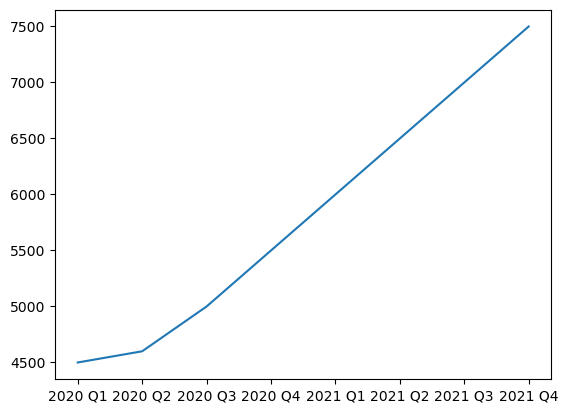

In [13]:
# Visualize results
plt.plot(df['Year'].astype(str) + ' ' + df['Quarter'], df[target], label='Actual')
plt.plot(df['Year'].astype(str) + ' ' + df['Quarter'].iloc[len(y_train):], final_predictions, label='Predicted', linestyle='--')
plt.xlabel('Quarter')
plt.ylabel('Net Increase/Decrease in Cash Equivalents')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

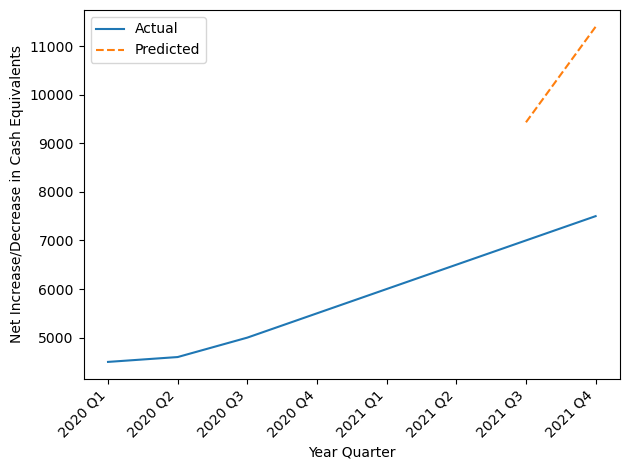

In [14]:
# Create a new column with 'Year' and 'Quarter' combined
df['YearQuarter'] = df['Year'].astype(str) + ' ' + df['Quarter']

# Plotting
plt.plot(df['YearQuarter'], df[target], label='Actual')
plt.plot(df['YearQuarter'].iloc[len(y_train):], final_predictions, label='Predicted', linestyle='--')
plt.xlabel('Year Quarter')
plt.ylabel('Net Increase/Decrease in Cash Equivalents')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# Make predictions for the next 4 quarters
future_quarters = 4
future_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=future_quarters, freq='Q')
future_X = pd.DataFrame(index=future_index, columns=features)

TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'